# **OMOTOSHO STEVEN OLUMUYIWA Assignment 4: TechCrush AI BootCamp**

# **Import packages**

In [114]:
# Cell 1: Imports
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline


# **Upload/Load the dataset**

In [115]:
# Load dataset (upload Raisin_Dataset.xlsx via the Colab Files panel OR use files.upload())
# Note to Future users: If you haven't uploaded the file, uncomment and run👇🏼:
# from google.colab import files
# files.upload()

#I decided to upload mine, downloaded form Kaggle (https://www.kaggle.com/datasets/huseyincenik/raisin-dataset?resource=download)
df = pd.read_excel("Raisin_Dataset.xlsx")   # adjust filename to suit if needed
print("Loaded dataset shape:", df.shape)


Loaded dataset shape: (900, 8)


# **Preview dataset**

In [116]:
# Preview and inspect
print("🔹 First 5 rows:")
display(df.head(5))

print("\n🔹 Last 5 rows:")
display(df.tail(5))

print("\n🔹 Dataframe info:")
display(df.info())

print("\n🔹 Class distribution:")
print(df['Class'].value_counts())


🔹 First 5 rows:


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1



🔹 Last 5 rows:


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,0



🔹 Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


None


🔹 Class distribution:
Class
1    450
0    450
Name: count, dtype: int64


# Encode class labels to 0 / 1 (Since it works, I wouldn't touch it)


In [117]:
# Optional: converts 'Besni'/'Kecimen' → 0/1 and keeps mapping.
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])
print("Label mapping (string -> numeric):", dict(zip(le.classes_, le.transform(le.classes_))))
# Example: {'Besni': 0, 'Kecimen': 1}


Label mapping (string -> numeric): {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}


# **Prepare features (X) and target (y), then split (80:20, stratified)**

In [118]:
# Cell 5: Create X and y and do a stratified train-test split
X = df.drop(['Class', 'Class_encoded'], axis=1)   # features
y = df['Class_encoded']                           # numeric target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


Train shape: (720, 7) Test shape: (180, 7)
Train class distribution:
 Class_encoded
0    0.5
1    0.5
Name: proportion, dtype: float64
Test class distribution:
 Class_encoded
0    0.5
1    0.5
Name: proportion, dtype: float64


# **Train Logistic Regression**


> StandardScaler + LogisticRegression





In [119]:
# Cell 6: Build the pipeline (StandardScaler + LogisticRegression)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000, random_state=42))
])


# **Cross Validation**

In [120]:
# Cell 7: 5-fold CV on training data
cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print("CV scores:", cv_scores)
print("Mean CV accuracy: {:.3f} ± {:.3f}".format(cv_scores.mean(), cv_scores.std()))


CV scores: [0.79166667 0.88888889 0.86111111 0.86111111 0.91666667]
Mean CV accuracy: 0.864 ± 0.042


# Fit pipeline on full training set & predict on test **set**

In [121]:
# Cell 8: Fit on full training set and predict on test set
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


# Evaluation (accuracy, classification report)

In [122]:
# Cell 9: Evaluation metrics
test_acc = accuracy_score(y_test, y_pred)
print("🎯 Test Accuracy: {:.4f}".format(test_acc))

print("\n📑 Classification Report:")
# use string class names instead of numeric
print(classification_report(y_test, y_pred, target_names=['Besni', 'Kecimen']))

cm = confusion_matrix(y_test, y_pred)
print("\n📌 Confusion Matrix:\n", cm)


🎯 Test Accuracy: 0.8889

📑 Classification Report:
              precision    recall  f1-score   support

       Besni       0.94      0.83      0.88        90
     Kecimen       0.85      0.94      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180


📌 Confusion Matrix:
 [[75 15]
 [ 5 85]]


# **Plot confusion matrix**

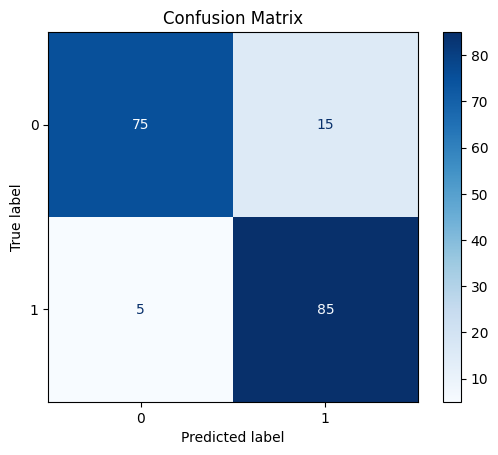

In [123]:
# Cell 10: Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# **Load saved model**

In [124]:
# Cell 11: Save the trained pipeline (scaler + model)
joblib.dump(pipe, "raisin_pipeline.joblib")
print("✅ Saved pipeline to 'raisin_pipeline.joblib'")


✅ Saved pipeline to 'raisin_pipeline.joblib'
